## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [78]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

'wget' is not recognized as an internal or external command,
operable program or batch file.


1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [79]:
import numpy as np
import pandas as pd

file_name="~/LaboratoryOfComputationalPhysics_Y5/data/data_000637.txt"

data=pd.read_csv(file_name)
print("Number of rows:", len(data.values))

print("data type: ", type(data))

N = 25000
print("Read", N, "rows")

df = data[:N].copy()
df[:50]

print("df type: ", type(df), len(df))


Number of rows: 1310720
data type:  <class 'pandas.core.frame.DataFrame'>
Read 25000 rows
df type:  <class 'pandas.core.frame.DataFrame'> 25000


2\. Find out the number of BX in a ORBIT (the value 'x').

In [80]:
x = df.max()[4] - 1
print(x)

3562


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [81]:
# Assuming an approximately linear relationship between number of measurements taken
# and time passed, we can calculate total time from the fraction 
# 25'000/1310720 = len.data.values

i = df.iloc[0]
f = df.iloc[-1]

delta_orbit = f[3] - i[3]
delta_bxCount = f[4] - i[4]
delta_TDC = f[5] - i[5]

# time passed in nanoseconds

t_fraction = delta_orbit*x*25 + delta_bxCount*25 + delta_TDC*25/30

print("Seconds passed: ", t_fraction/(10**9))

print("Total time elapsed (estimate based on fraction): ", t_fraction*len(data.values)/N/(10**9), "s")

i = data.iloc[0]
f = data.iloc[-1]

delta_orbit = f[3] - i[3]
delta_bxCount = f[4] - i[4]
delta_TDC = f[5] - i[5]

t_total = delta_orbit*x*25 + delta_bxCount*25 + delta_TDC*25/30

print("Total time elapsed: ", t_total/(10**9), "s")


Seconds passed:  0.02216660833333333
Total time elapsed (estimate based on fraction):  1.1621686749866666 s
Total time elapsed:  0.9798658933333334 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [82]:
df["time_elapsed (ns)"] = pd.Series((df["ORBIT_CNT"]*x*25 + df["BX_COUNTER"]*25 + df["TDC_MEAS"]*25/30), index=df.index)

df.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_elapsed (ns)
0,1,0,123,3869200167,2374,26,3.445523e+14
1,1,0,124,3869200167,2374,27,3.445523e+14
2,1,0,63,3869200167,2553,28,3.445523e+14
3,1,0,64,3869200167,2558,19,3.445523e+14
4,1,0,64,3869200167,2760,25,3.445523e+14
5,1,0,63,3869200167,2762,4,3.445523e+14
6,1,0,61,3869200167,2772,14,3.445523e+14
7,1,0,139,3869200167,2776,0,3.445523e+14
8,1,0,62,3869200167,2774,21,3.445523e+14
9,1,0,60,3869200167,2788,7,3.445523e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [83]:
df.loc[:,"HEAD"] = np.random.randint(0,2,df.shape[0])

#data.loc[:,"HEAD"] = np.random.randint(0,2,data.shape[0])
df.head(40)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_elapsed (ns)
0,1,0,123,3869200167,2374,26,3.445523e+14
1,1,0,124,3869200167,2374,27,3.445523e+14
2,1,0,63,3869200167,2553,28,3.445523e+14
3,1,0,64,3869200167,2558,19,3.445523e+14
4,0,0,64,3869200167,2760,25,3.445523e+14
5,1,0,63,3869200167,2762,4,3.445523e+14
6,1,0,61,3869200167,2772,14,3.445523e+14
7,1,0,139,3869200167,2776,0,3.445523e+14
8,0,0,62,3869200167,2774,21,3.445523e+14
9,1,0,60,3869200167,2788,7,3.445523e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [87]:
newdf = df[df["HEAD"] == 1].copy()
newdf.head(40)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time_elapsed (ns)
0,1,0,123,3869200167,2374,26,3.445523e+14
1,1,0,124,3869200167,2374,27,3.445523e+14
2,1,0,63,3869200167,2553,28,3.445523e+14
3,1,0,64,3869200167,2558,19,3.445523e+14
5,1,0,63,3869200167,2762,4,3.445523e+14
6,1,0,61,3869200167,2772,14,3.445523e+14
7,1,0,139,3869200167,2776,0,3.445523e+14
9,1,0,60,3869200167,2788,7,3.445523e+14
11,1,0,64,3869200167,2786,19,3.445523e+14
14,1,0,56,3869200167,2789,3,3.445523e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

17551


<AxesSubplot:ylabel='Frequency'>

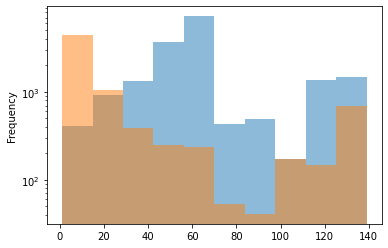

In [111]:
import matplotlib.pyplot as plt

df0 = df[df["FPGA"] == 0].copy()
print(len(df0))

df1 = df[df["FPGA"] == 1].copy()
len(df1)

df0["TDC_CHANNEL"].plot(kind="hist", alpha=0.5, logy = True)
df1["TDC_CHANNEL"].plot(kind="hist", alpha=0.5, logy = True)

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [155]:
dfgroup = df.groupby(["FPGA", "TDC_CHANNEL"]).count().sort_values(by="HEAD", ascending=False)
#print(dfgroup.to_string())
print(dfgroup.iloc[0:3])

                  HEAD  ORBIT_CNT  BX_COUNTER  TDC_MEAS  time_elapsed (ns)
FPGA TDC_CHANNEL                                                          
0    139          1468       1468        1468      1468               1468
     64           1232       1232        1232      1232               1232
     63           1207       1207        1207      1207               1207


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [167]:
print(df.groupby("ORBIT_CNT").count())

print("Number of unique orbits: ", len(df.groupby("ORBIT_CNT").count()))

df139 = df[df["TDC_CHANNEL"] == 139].groupby("ORBIT_CNT").count()
df139

print("Number of unique orbits with at least one count from TDC_CHANNEL = 139: ", len(df139))

            HEAD  FPGA  TDC_CHANNEL  BX_COUNTER  TDC_MEAS  time_elapsed (ns)
ORBIT_CNT                                                                   
3869200167    43    43           43          43        43                 43
3869200168    85    85           85          85        85                 85
3869200169   127   127          127         127       127                127
3869200170    98    98           98          98        98                 98
3869200171   109   109          109         109       109                109
...          ...   ...          ...         ...       ...                ...
3869200412   128   128          128         128       128                128
3869200413    85    85           85          85        85                 85
3869200414   114   114          114         114       114                114
3869200415    62    62           62          62        62                 62
3869200416    36    36           36          36        36                 36